# Classification Model for Car Insurance Claims

In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
import math

## Section 1: Data Pre-Processing

In [3]:
#Convert csv to dataframe

df = pd.read_csv("car_insurance_claim.csv")

In [4]:
#A look at the dataframe

df.head()

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ   INCOME PARENT1  \
0   63581743         0  16MAR39  60.0         0  11.0  $67,349      No   
1  132761049         0  21JAN56  43.0         0  11.0  $91,449      No   
2  921317019         0  18NOV51  48.0         0  11.0  $52,881      No   
3  727598473         0  05MAR64  35.0         1  10.0  $16,039      No   
4  450221861         0  05JUN48  51.0         0  14.0      NaN      No   

   HOME_VAL MSTATUS  ... CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED MVR_PTS  \
0        $0    z_No  ...  Minivan     yes   $4,461         2      No       3   
1  $257,252    z_No  ...  Minivan     yes       $0         0      No       0   
2        $0    z_No  ...      Van     yes       $0         0      No       2   
3  $124,191     Yes  ...    z_SUV      no  $38,690         2      No       3   
4  $306,251     Yes  ...  Minivan     yes       $0         0      No       0   

   CLM_AMT CAR_AGE CLAIM_FLAG           URBANICITY  
0       $0    18.0          0  Highly Urban/ Urban  
1       $0     1.0          0  Highly Urban/ Urban  
2       $0    10.0          0  Highly Urban/ Urban  
3       $0    10.0          0  Highly Urban/ Urban  
4       $0     6.0          0  Highly Urban/ Urban  

[5 rows x 27 columns]

In [5]:
#Remove ID, Birthdate, and Claim Amount columns as they are either irrelevant or too indicative

df = df.drop(columns=['ID', 'CLM_AMT', 'BIRTH'], axis=1)

df.head()

KIDSDRIV   AGE  HOMEKIDS   YOJ   INCOME PARENT1  HOME_VAL MSTATUS GENDER  \
0         0  60.0         0  11.0  $67,349      No        $0    z_No      M   
1         0  43.0         0  11.0  $91,449      No  $257,252    z_No      M   
2         0  48.0         0  11.0  $52,881      No        $0    z_No      M   
3         0  35.0         1  10.0  $16,039      No  $124,191     Yes    z_F   
4         0  51.0         0  14.0      NaN      No  $306,251     Yes      M   

       EDUCATION  ... TIF  CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED  \
0            PhD  ...  11   Minivan     yes   $4,461         2      No   
1  z_High School  ...   1   Minivan     yes       $0         0      No   
2      Bachelors  ...   1       Van     yes       $0         0      No   
3  z_High School  ...   4     z_SUV      no  $38,690         2      No   
4   <High School  ...   7   Minivan     yes       $0         0      No   

  MVR_PTS CAR_AGE  CLAIM_FLAG           URBANICITY  
0       3    18.0           0  Highly Urban/ Urban  
1       0     1.0           0  Highly Urban/ Urban  
2       2    10.0           0  Highly Urban/ Urban  
3       3    10.0           0  Highly Urban/ Urban  
4       0     6.0           0  Highly Urban/ Urban  

[5 rows x 24 columns]

<Axes: xlabel='CLAIM_FLAG', ylabel='count'>

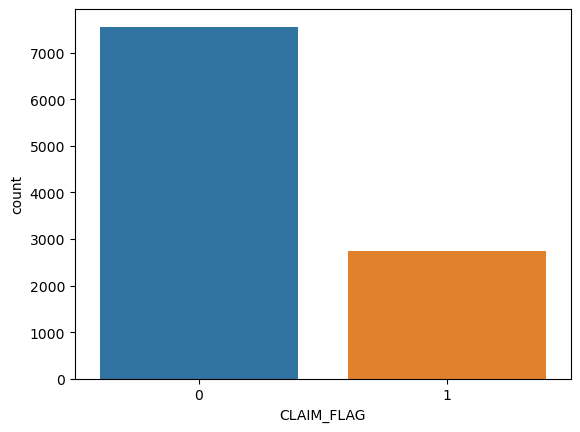

In [6]:
sns.countplot(x="CLAIM_FLAG", data=df)

In [7]:
df.isna().sum()

KIDSDRIV        0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KIDSDRIV    10302 non-null  int64  
 1   AGE         10295 non-null  float64
 2   HOMEKIDS    10302 non-null  int64  
 3   YOJ         9754 non-null   float64
 4   INCOME      9732 non-null   object 
 5   PARENT1     10302 non-null  object 
 6   HOME_VAL    9727 non-null   object 
 7   MSTATUS     10302 non-null  object 
 8   GENDER      10302 non-null  object 
 9   EDUCATION   10302 non-null  object 
 10  OCCUPATION  9637 non-null   object 
 11  TRAVTIME    10302 non-null  int64  
 12  CAR_USE     10302 non-null  object 
 13  BLUEBOOK    10302 non-null  object 
 14  TIF         10302 non-null  int64  
 15  CAR_TYPE    10302 non-null  object 
 16  RED_CAR     10302 non-null  object 
 17  OLDCLAIM    10302 non-null  object 
 18  CLM_FREQ    10302 non-null  int64  
 19  REVOKED     10302 non-nul

In [9]:
def fix_money(word):
    if not pd.isnull(word):
        new_money = word.replace(",", "")
        return float(new_money[1:])
    else:
        return word

In [10]:
money_list = ["INCOME", "HOME_VAL", "BLUEBOOK", "OLDCLAIM"]

for i in money_list:
    df[i] = df[i].apply(fix_money)
    
df

KIDSDRIV   AGE  HOMEKIDS   YOJ    INCOME PARENT1  HOME_VAL MSTATUS  \
0             0  60.0         0  11.0   67349.0      No       0.0    z_No   
1             0  43.0         0  11.0   91449.0      No  257252.0    z_No   
2             0  48.0         0  11.0   52881.0      No       0.0    z_No   
3             0  35.0         1  10.0   16039.0      No  124191.0     Yes   
4             0  51.0         0  14.0       NaN      No  306251.0     Yes   
...         ...   ...       ...   ...       ...     ...       ...     ...   
10297         1  45.0         2   9.0  164669.0      No  386273.0     Yes   
10298         0  46.0         0   9.0  107204.0      No  332591.0     Yes   
10299         0  48.0         0  15.0   39837.0      No  170611.0     Yes   
10300         0  50.0         0   7.0   43445.0      No  149248.0     Yes   
10301         0  52.0         0  11.0   53235.0      No  197017.0     Yes   

      GENDER      EDUCATION  ... TIF     CAR_TYPE RED_CAR  OLDCLAIM  CLM_FREQ  \
0          M            PhD  ...  11      Minivan     yes    4461.0         2   
1          M  z_High School  ...   1      Minivan     yes       0.0         0   
2          M      Bachelors  ...   1          Van     yes       0.0         0   
3        z_F  z_High School  ...   4        z_SUV      no   38690.0         2   
4          M   <High School  ...   7      Minivan     yes       0.0         0   
...      ...            ...  ...  ..          ...     ...       ...       ...   
10297      M            PhD  ...  15      Minivan      no       0.0         0   
10298      M        Masters  ...   6  Panel Truck      no       0.0         0   
10299    z_F   <High School  ...   7        z_SUV      no       0.0         0   
10300    z_F      Bachelors  ...   6      Minivan      no       0.0         0   
10301    z_F  z_High School  ...   6      Minivan      no       0.0         0   

      REVOKED MVR_PTS  CAR_AGE  CLAIM_FLAG             URBANICITY  
0          No       3     18.0           0    Highly Urban/ Urban  
1          No       0      1.0           0    Highly Urban/ Urban  
2          No       2     10.0           0    Highly Urban/ Urban  
3          No       3     10.0           0    Highly Urban/ Urban  
4          No       0      6.0           0    Highly Urban/ Urban  
...       ...     ...      ...         ...                    ...  
10297      No       2     17.0           0    Highly Urban/ Urban  
10298      No       0      1.0           0    Highly Urban/ Urban  
10299      No       0      1.0           0    Highly Urban/ Urban  
10300      No       0     11.0           0    Highly Urban/ Urban  
10301      No       0      9.0           0  z_Highly Rural/ Rural  

[10302 rows x 24 columns]

In [11]:
null_list = ["YOJ", "INCOME", "HOME_VAL", "CAR_AGE"]

for i in null_list:
    df[i] = df[i].fillna(
        df[i].mean()
    )

C:\Users\westo\AppData\Local\Temp\ipykernel_48564\816024472.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


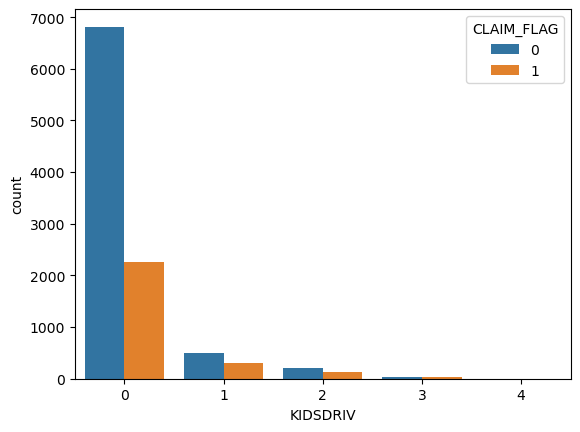

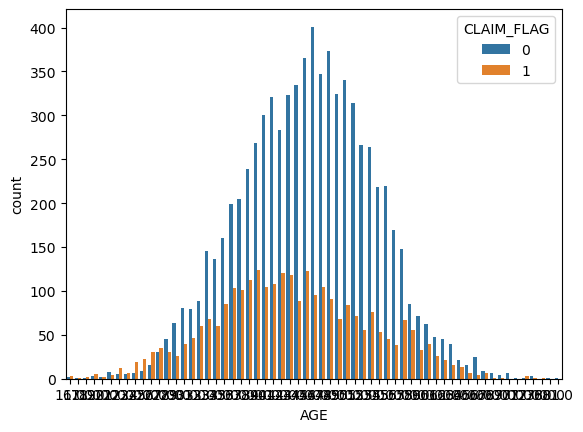

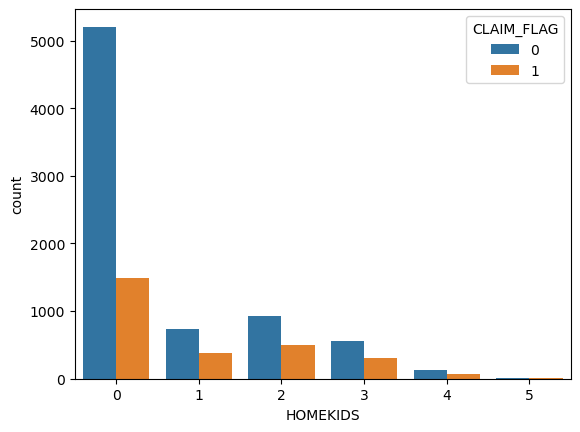

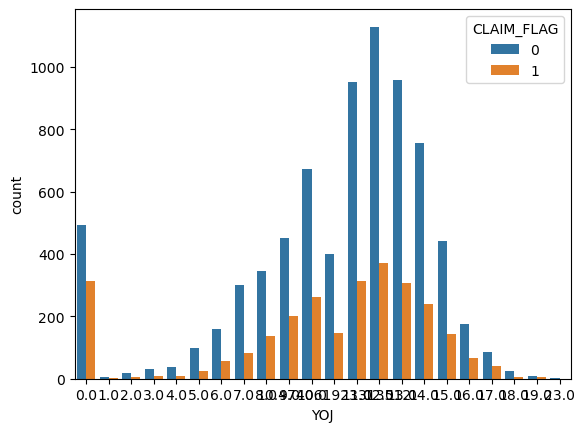

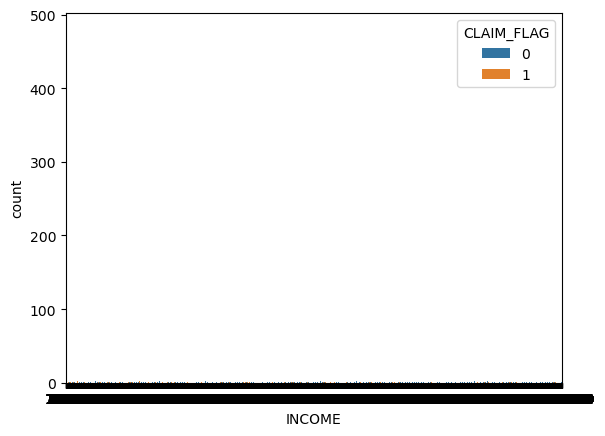

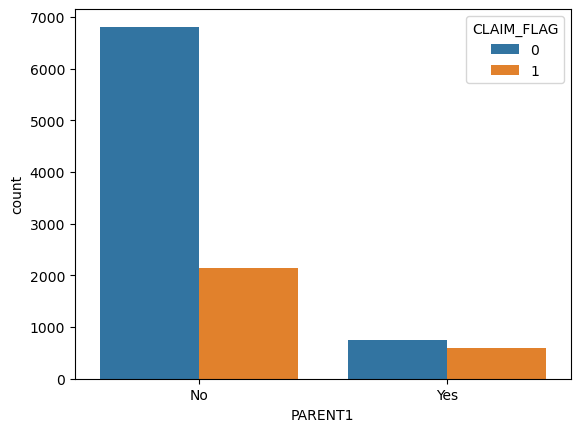

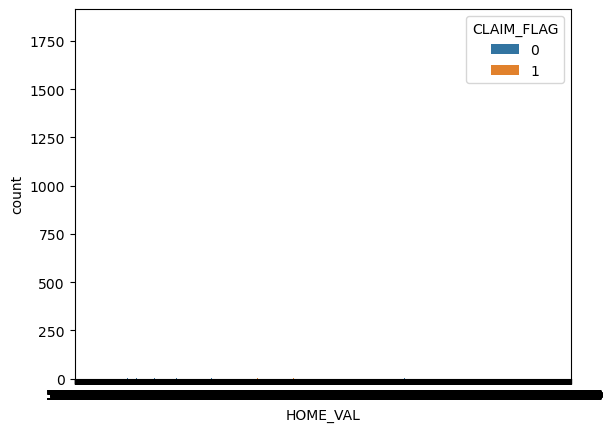

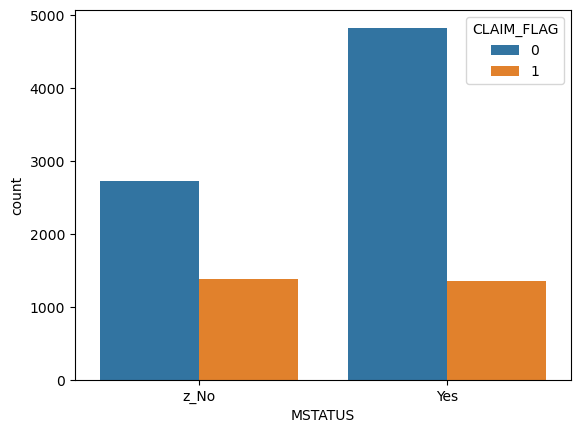

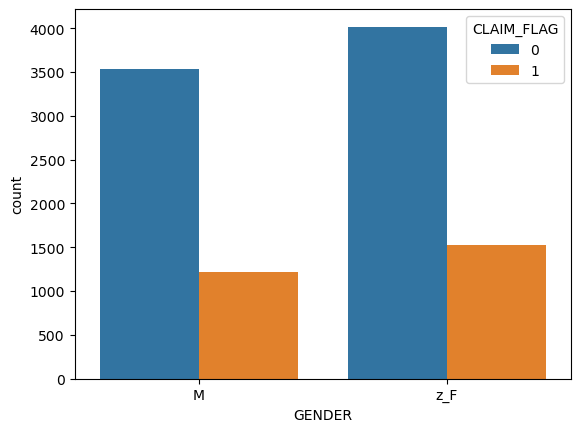

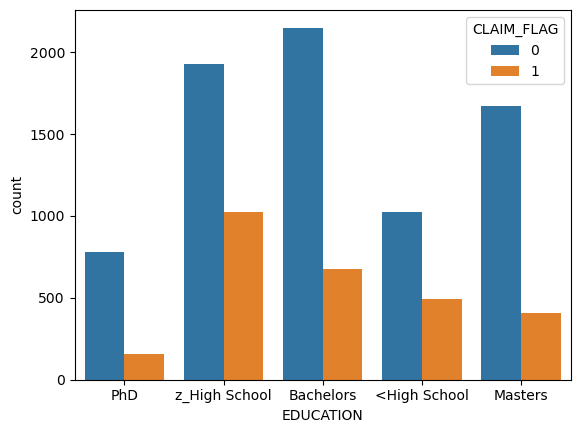

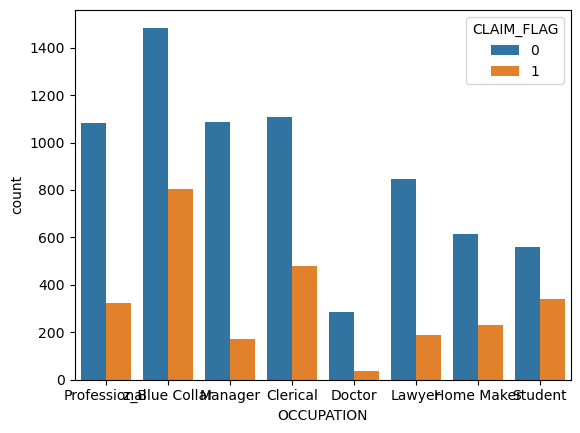

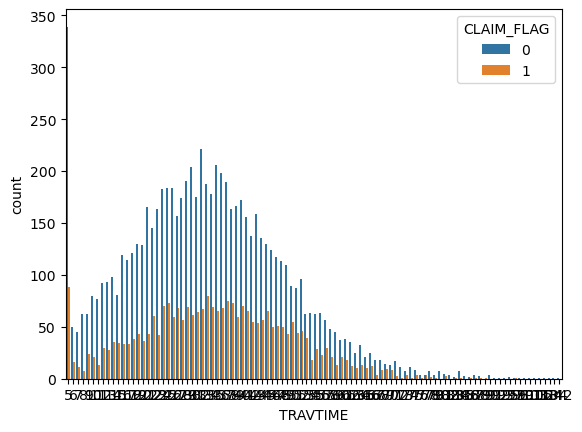

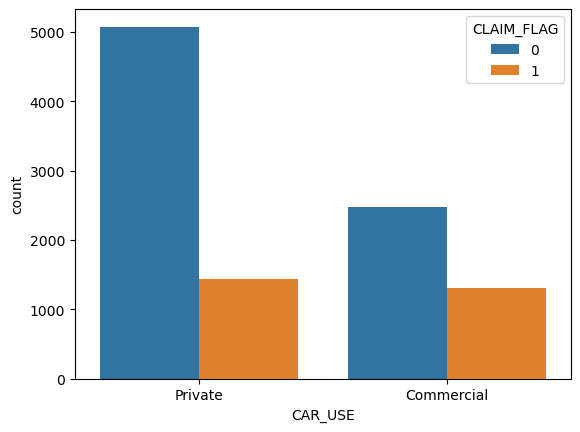

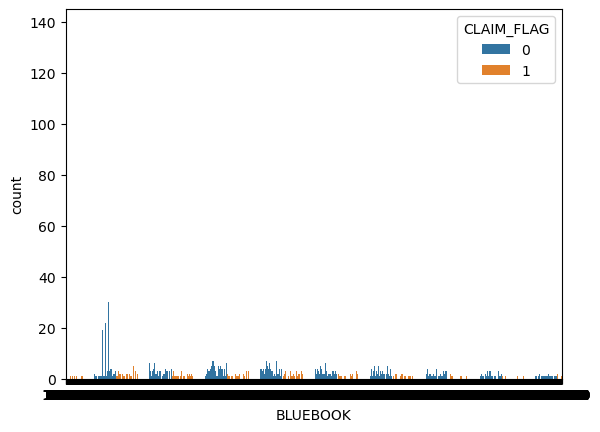

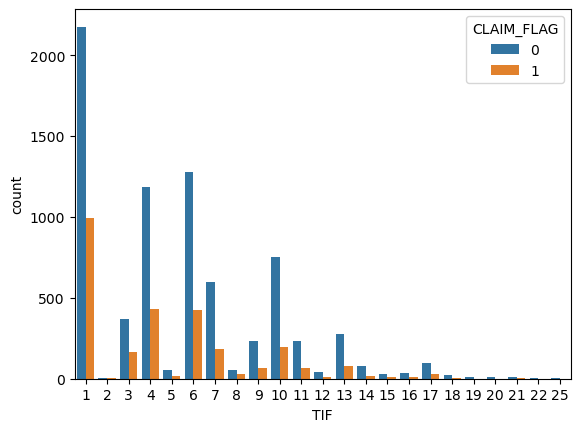

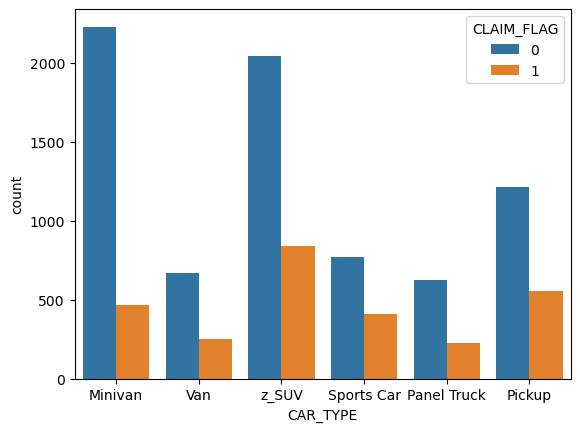

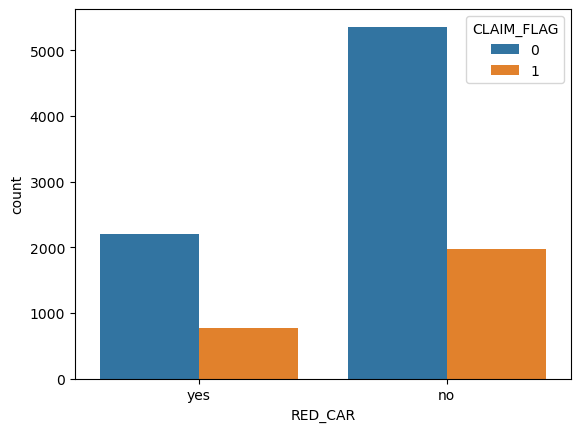

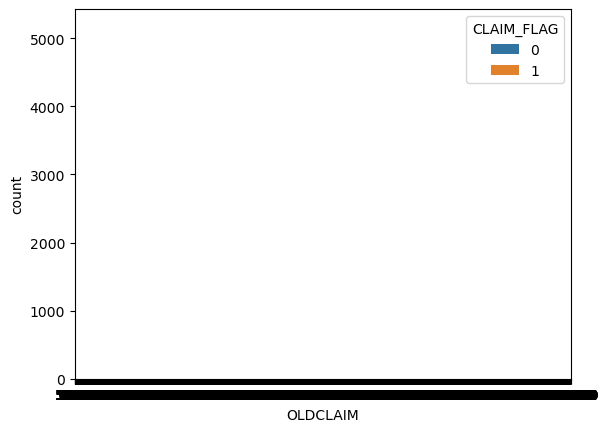

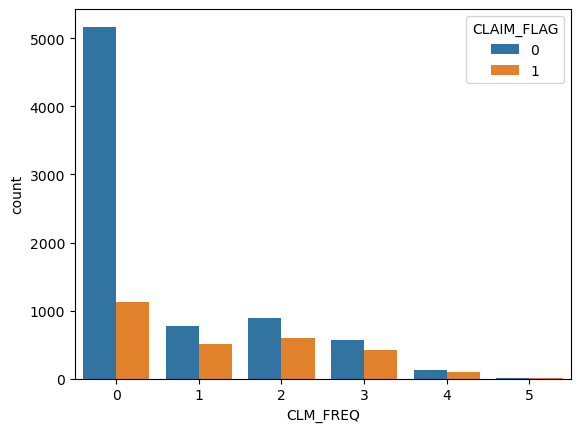

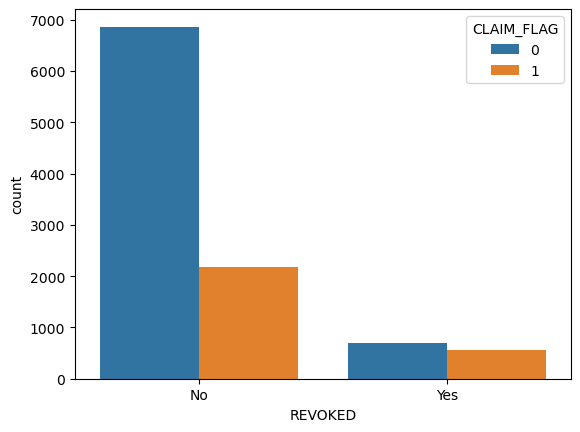

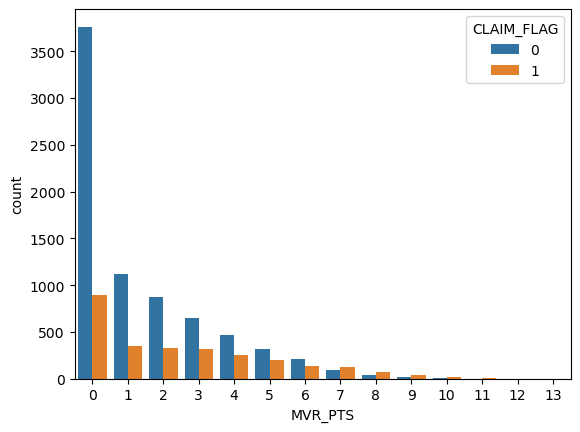

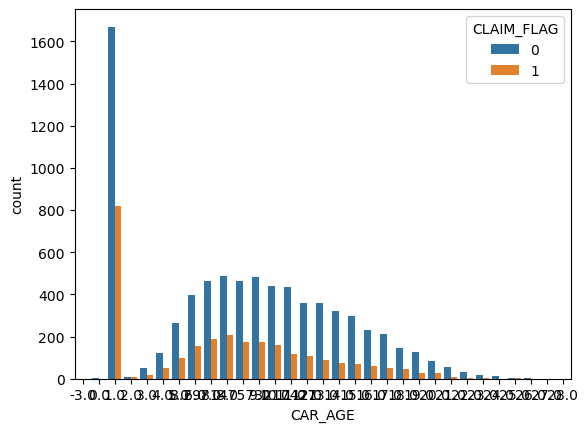

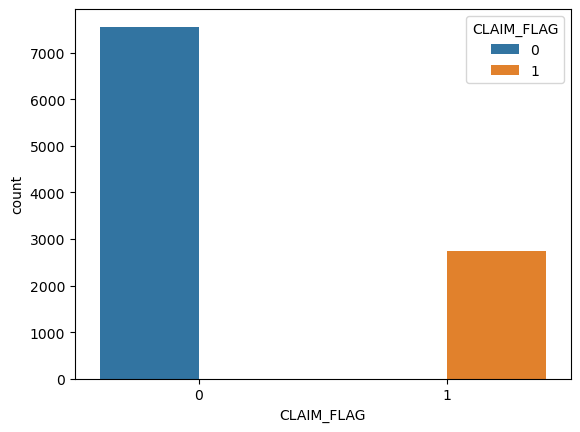

In [12]:
for i in df.columns[:-1]:
    plt.figure(i)
    sns.countplot(x = i, data=df, hue = 'CLAIM_FLAG')

In [13]:
len(df)

10302

In [14]:
df = df.dropna(axis=0)

In [15]:
len(df)

9630

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9630 entries, 0 to 10301
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KIDSDRIV    9630 non-null   int64  
 1   AGE         9630 non-null   float64
 2   HOMEKIDS    9630 non-null   int64  
 3   YOJ         9630 non-null   float64
 4   INCOME      9630 non-null   float64
 5   PARENT1     9630 non-null   object 
 6   HOME_VAL    9630 non-null   float64
 7   MSTATUS     9630 non-null   object 
 8   GENDER      9630 non-null   object 
 9   EDUCATION   9630 non-null   object 
 10  OCCUPATION  9630 non-null   object 
 11  TRAVTIME    9630 non-null   int64  
 12  CAR_USE     9630 non-null   object 
 13  BLUEBOOK    9630 non-null   float64
 14  TIF         9630 non-null   int64  
 15  CAR_TYPE    9630 non-null   object 
 16  RED_CAR     9630 non-null   object 
 17  OLDCLAIM    9630 non-null   float64
 18  CLM_FREQ    9630 non-null   int64  
 19  REVOKED     9630 non-null 

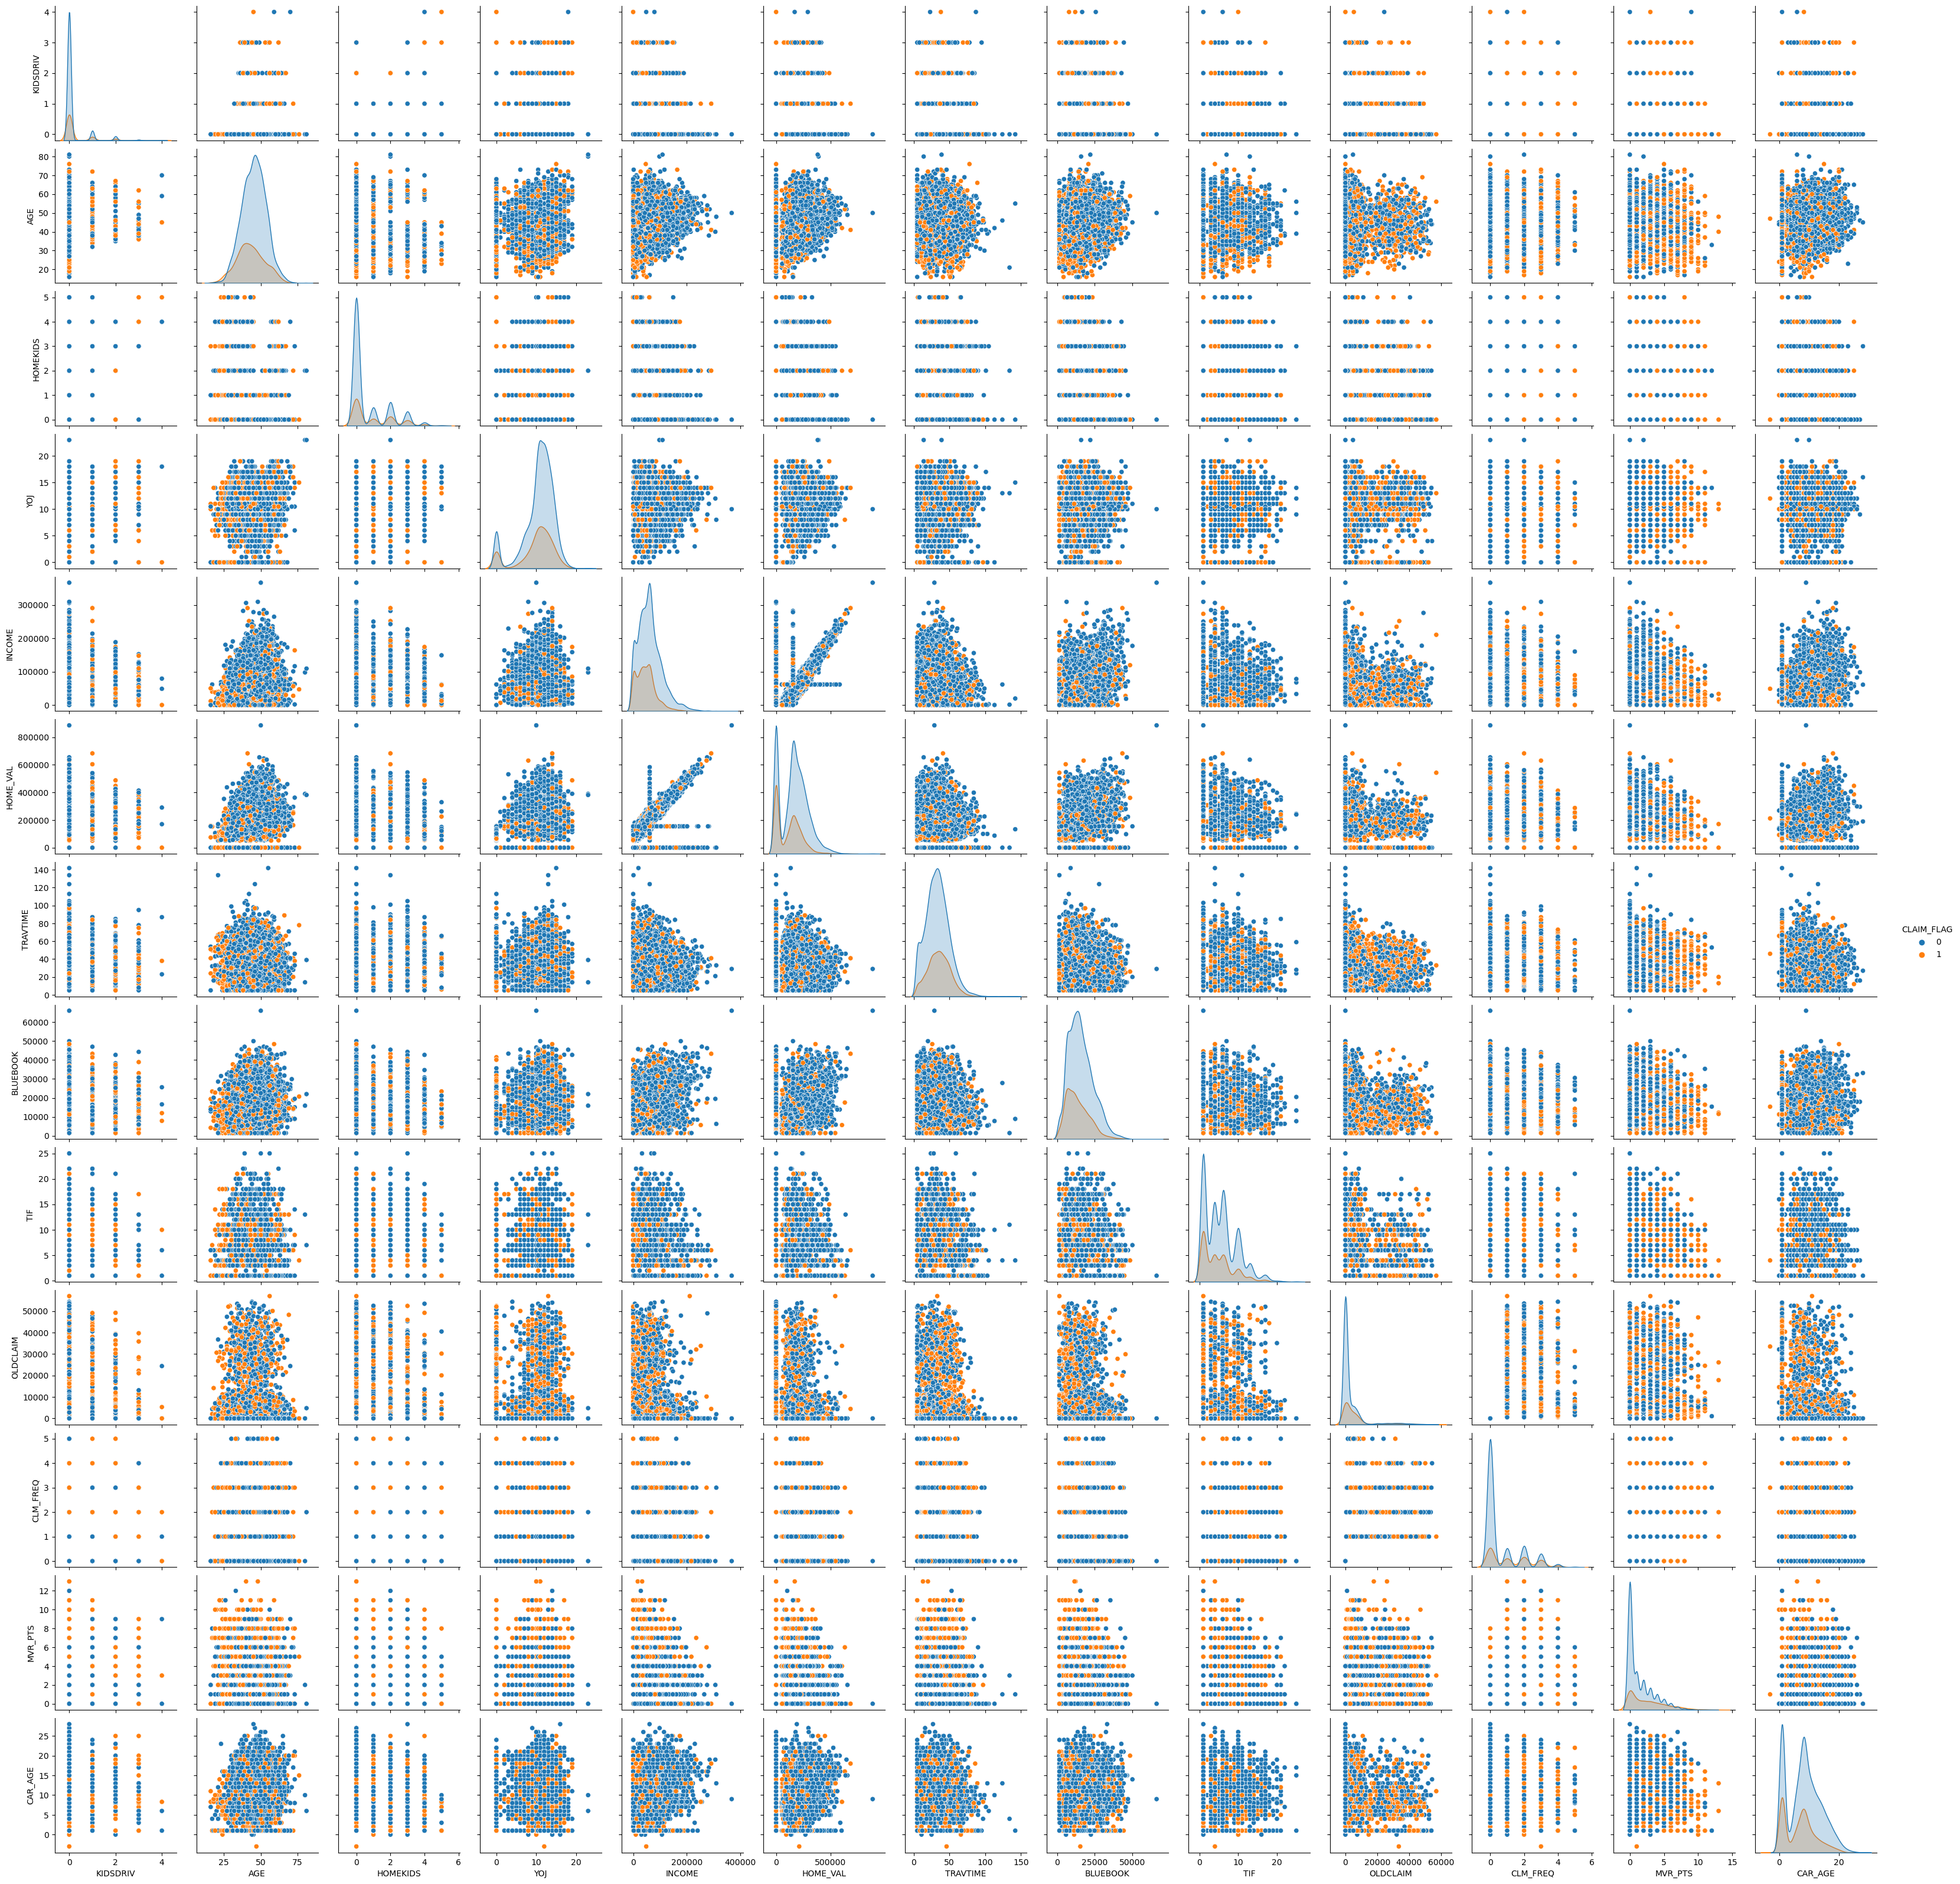

In [17]:
sns.pairplot(df, hue="CLAIM_FLAG")

In [18]:
from sklearn.preprocessing import LabelEncoder

#Encode non-numeric data

obj_list = ["PARENT1", "MSTATUS", "GENDER", "EDUCATION", "OCCUPATION", "CAR_USE", "CAR_TYPE", "RED_CAR", "REVOKED", "URBANICITY"]

for i in obj_list:
    le = LabelEncoder()
    le.fit(df[i])
    df[i] = le.transform(df[i])

C:\Users\westo\AppData\Local\Temp\ipykernel_48564\662962883.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.transform(df[i])
C:\Users\westo\AppData\Local\Temp\ipykernel_48564\662962883.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.transform(df[i])
C:\Users\westo\AppData\Local\Temp\ipykernel_48564\662962883.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

## Section 2: Model Creation

### Testing Different Models

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

X = df.drop(columns=['CLAIM_FLAG'])
t = df['CLAIM_FLAG']

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2, random_state=0)

{'BLUEBOOK': -0.0006230529595015577, 'AGE': -0.0004153686396677125, 'CAR_AGE': -0.00031152647975076777, 'MVR_PTS': -0.00020768431983384517, 'TRAVTIME': -0.00015576323987538389, 'YOJ': -0.00012980269989615323, 'CLM_FREQ': -5.192107995846129e-05, 'CAR_TYPE': -2.5960539979230646e-05, 'INCOME': -2.2204460492503132e-17, 'KIDSDRIV': 0.0, 'HOMEKIDS': 0.0, 'PARENT1': 0.0, 'MSTATUS': 0.0, 'GENDER': 0.0, 'EDUCATION': 0.0, 'CAR_USE': 0.0, 'RED_CAR': 0.0, 'REVOKED': 0.0, 'URBANICITY': 0.0, 'OCCUPATION': 5.192107995846129e-05, 'TIF': 0.00033748701972999837, 'HOME_VAL': 0.0012720664589823461, 'OLDCLAIM': 0.0062045690550363245}
Train Accuracy: 0.7316978193146417, Test Accuracy: 0.7320872274143302


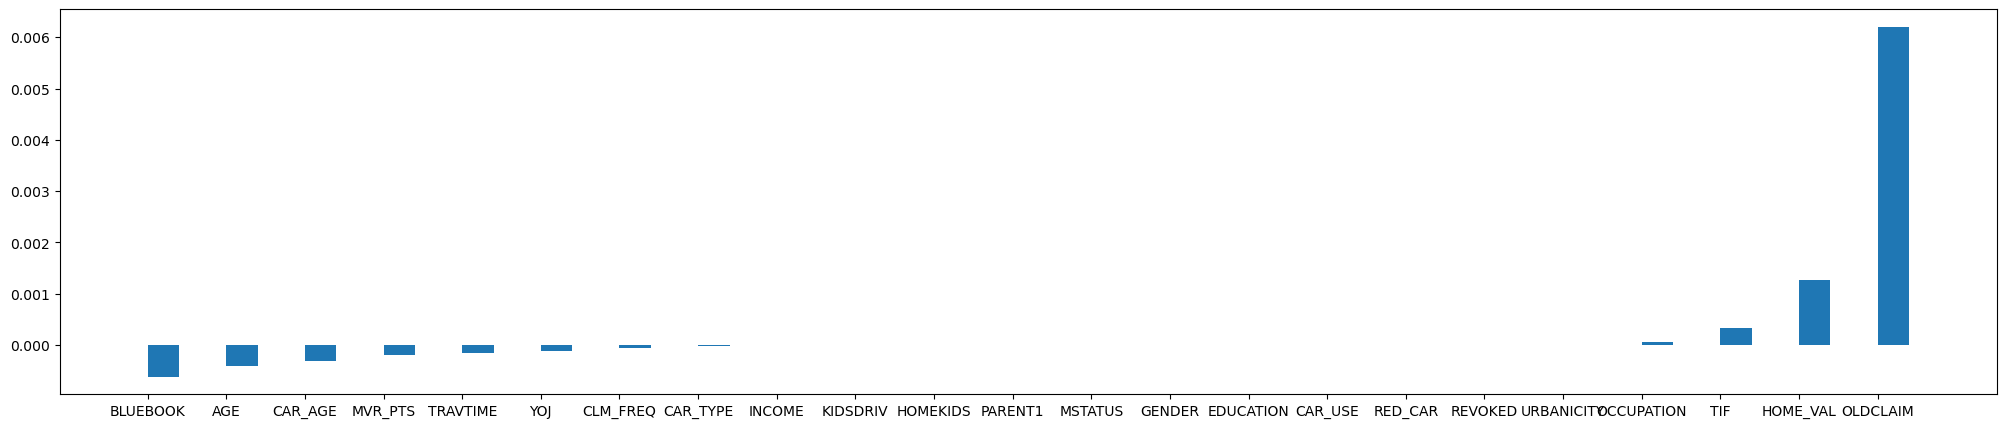

In [20]:
clf = LogisticRegression()

clf.fit(X_train, t_train)

train_score = clf.score(X_train, t_train)

test_score = clf.score(X_test, t_test)

model_fi = permutation_importance(clf, X_train, t_train)
imp_dict = {}

for i in range(23):
    imp_dict[X_train.columns[i]] = model_fi['importances_mean'][i]
    
imp_sorted = dict(sorted(imp_dict.items(), key=lambda item: item[1]))    

print(imp_sorted)

plt.figure(figsize=(25, 5))  # width:20, height:3
plt.bar(range(len(imp_sorted)), imp_sorted.values(), align='edge', width=0.4)
plt.xticks(range(len(imp_sorted)), list(imp_sorted.keys()))

print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))

In [21]:
X = df[['AGE', 'YOJ', 'HOME_VAL', 'TRAVTIME', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CAR_AGE']]
t = df['CLAIM_FLAG']

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2, random_state=0)

In [22]:
clf = LogisticRegression()

clf.fit(X_train, t_train)

train_score = clf.score(X_train, t_train)

test_score = clf.score(X_test, t_test)

print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))

Train Accuracy: 0.7472741433021807, Test Accuracy: 0.7440290758047767


C:\Users\westo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf.fit(X_train, t_train)

train_score = clf.score(X_train, t_train)

test_score = clf.score(X_test, t_test)

print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))

Train Accuracy: 0.7306593977154725, Test Accuracy: 0.7289719626168224


In [24]:
from sklearn.linear_model import Ridge

clf = Ridge()

clf.fit(X_train, t_train)

train_score = clf.score(X_train, t_train)

test_score = clf.score(X_test, t_test)

print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))

Train Accuracy: 0.11693644948376292, Test Accuracy: 0.10273547986118592


In [25]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

clf.fit(X_train, t_train)

train_score = clf.score(X_train, t_train)

test_score = clf.score(X_test, t_test)

print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))

Train Accuracy: 0.7940031152647975, Test Accuracy: 0.7087227414330218


In [26]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train, t_train)

train_score = clf.score(X_train, t_train)

test_score = clf.score(X_test, t_test)

print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))

Train Accuracy: 0.9996105919003115, Test Accuracy: 0.6490134994807892


              precision    recall  f1-score   support

           0       0.76      0.95      0.85      1416
           1       0.58      0.18      0.28       510

    accuracy                           0.75      1926
   macro avg       0.67      0.57      0.56      1926
weighted avg       0.71      0.75      0.70      1926



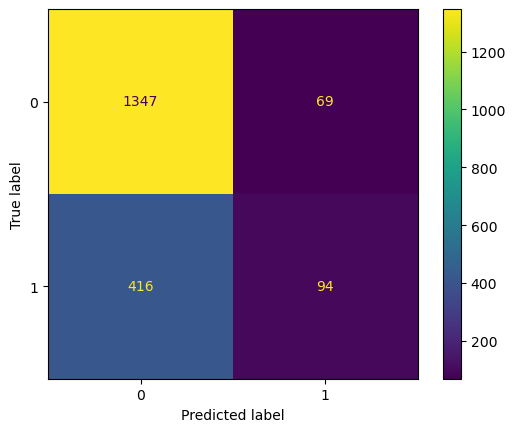

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

clf = LogisticRegression(max_iter=10000)

clf.fit(X_train, t_train)

preds = clf.predict(X_test)

cm_report = classification_report(t_test, preds)

print(cm_report)

cm = confusion_matrix(t_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()